# Task-2 Movie rating Prediction

Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [10]:
df=pd.read_csv("IMDb Movies India.csv",encoding="latin 1")

In [11]:
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# shape 
df.shape

(15509, 10)

In [13]:
#information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [14]:
# description of the data
df.describe(include="all")

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,15509,14981,7240,13632,7919.000000,7920,14984,13892,13125,12365
unique,13838,102,182,485,NaN,2034,5938,4718,4891,4820
top,Anjaam,(2019),120 min,Drama,NaN,8,Jayant Desai,Ashok Kumar,Rekha,Pran
freq,7,410,240,2780,NaN,227,58,158,83,91
mean,NaN,NaN,NaN,NaN,5.841621,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.381777,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.100000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,4.900000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,6.800000,NaN,NaN,NaN,NaN,NaN


In [24]:
# checking for the null values
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [25]:
# lets find the missing percentage of the columns
missing_count = df.isnull().sum().sort_values(ascending=False)
missing_percent = (round(df.isnull().sum()/df.isnull().count(), 4)*100).sort_values(ascending=False)
missing_data = pd.concat([missing_count, missing_percent], 
                       axis=1, 
                       keys=['missing_count', 'missing_percent'])
missing_data

,missing_count,missing_percent
Duration,8269,53.32
Rating,7590,48.94
Votes,7589,48.93
Actor 3,3144,20.27
Actor 2,2384,15.37
Genre,1877,12.10
Actor 1,1617,10.43
Year,528,3.40
Director,525,3.39
Name,0,0.00


In [32]:
# filling the duration missing values with mean .
df['Duration'] = pd.to_numeric(df['Duration'].str.strip(' min'))
df['Duration'].fillna(df['Duration'].mean(), inplace=True)

df.isnull().sum()

Name           0
Year         528
Duration       0
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [34]:
# droping the missing values .
df.dropna(inplace=True)

In [35]:
df.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [39]:
#drop duplicates
df.drop_duplicates(inplace=True)
df.shape

(7558, 10)

In [40]:
# lets remove the open and close parenthesis that are seen in the year column .
df['Year'] = df['Year'].apply(lambda x: x.split(')')[0])

year_lst = []
for val in df['Year']:
    if len(val.split('(')) == 1:
        year_lst.append(val.split('(')[0])
    elif len(val.split('(')) > 1:
        year_lst.append(val.split('(')[1])
df['Year'] = year_lst

In [42]:
# now convert votes and year
df['Votes'] = df['Votes'].str.replace(',', '').astype(int)
df['Year'] = df['Year'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7558 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7558 non-null   object 
 1   Year      7558 non-null   int32  
 2   Duration  7558 non-null   float64
 3   Genre     7558 non-null   object 
 4   Rating    7558 non-null   float64
 5   Votes     7558 non-null   int32  
 6   Director  7558 non-null   object 
 7   Actor 1   7558 non-null   object 
 8   Actor 2   7558 non-null   object 
 9   Actor 3   7558 non-null   object 
dtypes: float64(2), int32(2), object(6)
memory usage: 590.5+ KB


In [43]:
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109.000000,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110.000000,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147.000000,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142.000000,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82.000000,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15501,Zulm Ki Hukumat,1992,128.126519,"Action, Crime, Drama",5.3,135,Bharat Rangachary,Dharmendra,Moushumi Chatterjee,Govinda
15503,Zulm Ki Zanjeer,1989,125.000000,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15504,Zulm Ko Jala Doonga,1988,128.126519,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,1999,129.000000,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


# visualisation

In [46]:
df.Year.value_counts()

2019    238
2017    223
2018    214
2015    188
2016    184
       ... 
1939      4
1931      3
1932      2
1934      2
1917      1
Name: Year, Length: 92, dtype: int64

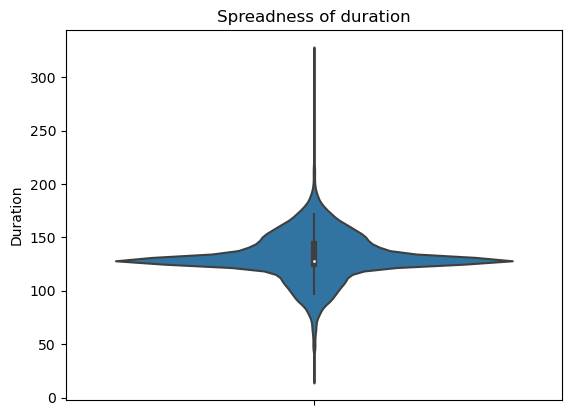

In [47]:
sns.violinplot(y=df['Duration'])
plt.title('Spreadness of duration')
plt.show()

<Axes: xlabel='Duration', ylabel='Count'>

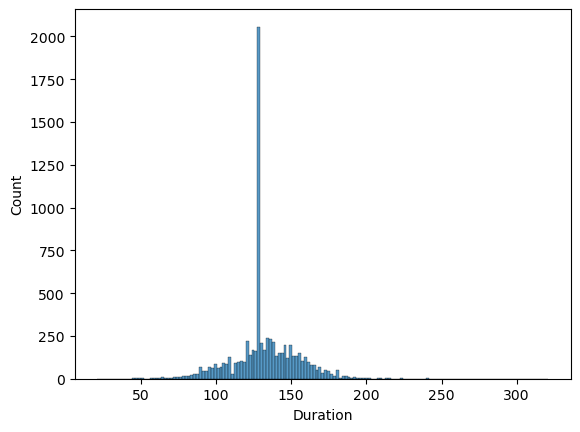

In [48]:
sns.histplot(df["Duration"])

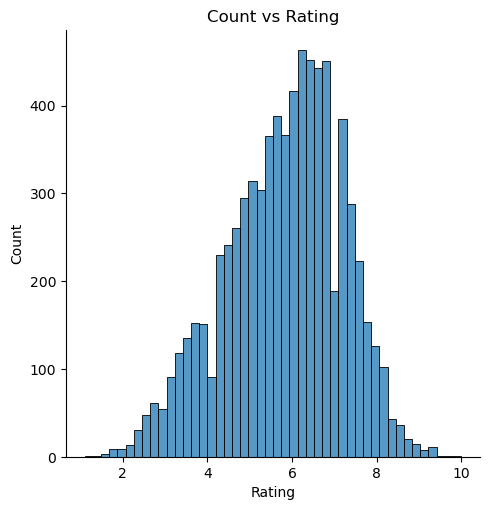

In [53]:
sns.displot(df["Rating"])
plt.title("Count vs Rating")
plt.show()

<Axes: xlabel='Rating', ylabel='Votes'>

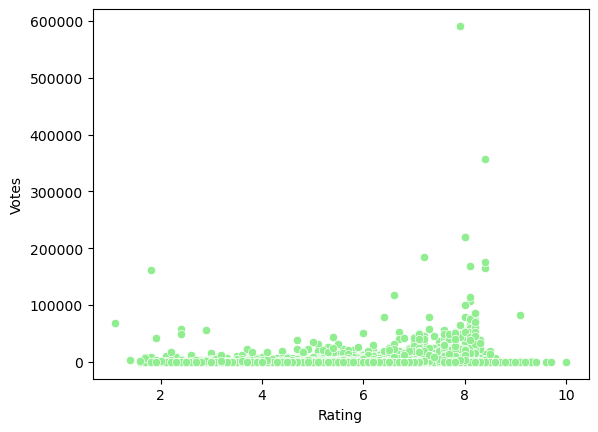

In [58]:
sns.scatterplot(y="Votes",x="Rating",data=df,color="lightgreen")

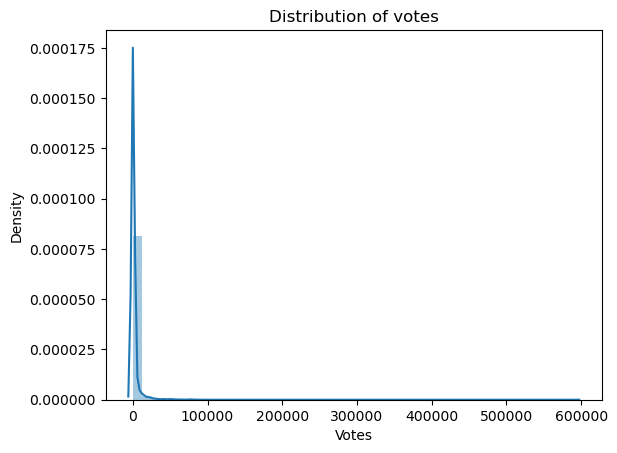

In [59]:
sns.distplot(df['Votes'])
plt.title('Distribution of votes')
plt.show()

In [61]:
# lets check the movies whose rating is greater than 8.4 and released in 2018 .
df.query("Rating>8.4 and Year==2018")

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1314,Ashok Vatika,2018,97.000000,Drama,9.3,7,Rahul Mallick,Kunj Anand,Sanjay Bishnoi,Paras Zutshi
1341,Atal Faisla,2018,127.000000,Drama,8.8,5,Abdul Sattar,Sahil Akhtar,Himayat Ali,Aman Jain
3202,Colour photo,2018,128.126519,Comedy,8.7,21,Aziz Naser,Gullu Dada,Shahbaz Khan,Aziz Naser
7883,Kuch Der Aur,2018,65.000000,Drama,8.5,41,Anurag Kawatra,Meenu Kawatra,Saajan Kataria,Rajesh Navgain
7939,Kutte Ki Dum,2018,143.000000,Comedy,8.9,10,Sunil Patel,Raz Rehman Ali,Jass Boparai,Tanya Daang
8466,Maassab (The Teacher),2018,116.000000,Drama,8.6,155,Aditya Om,Shiva Suryavanshi,Sheetal Singh,Manveer Choudhary
13676,T for Taj Mahal,2018,104.000000,Drama,8.7,93,Kireet Khurana,Subrat Dutta,Pitobash,Manoj Pahwa
14541,Turtle,2018,128.126519,Drama,8.6,9,Dinesh S. Yadav,Sanjay Mishra,Plabita Borthakur,Adnan Choudhary
14714,Vada Chennai,2018,164.000000,"Action, Crime, Drama",8.5,13120,Vetrimaaran,Dhanush,Ameer Sultan,Radha Ravi
15071,Win Marathon,2018,94.000000,"Drama, Sport",9.0,70,Aryan Neeraaj Anand,Shubhanshu Satyadeo,Aryan Neeraaj Anand,Ankita Bahuguna


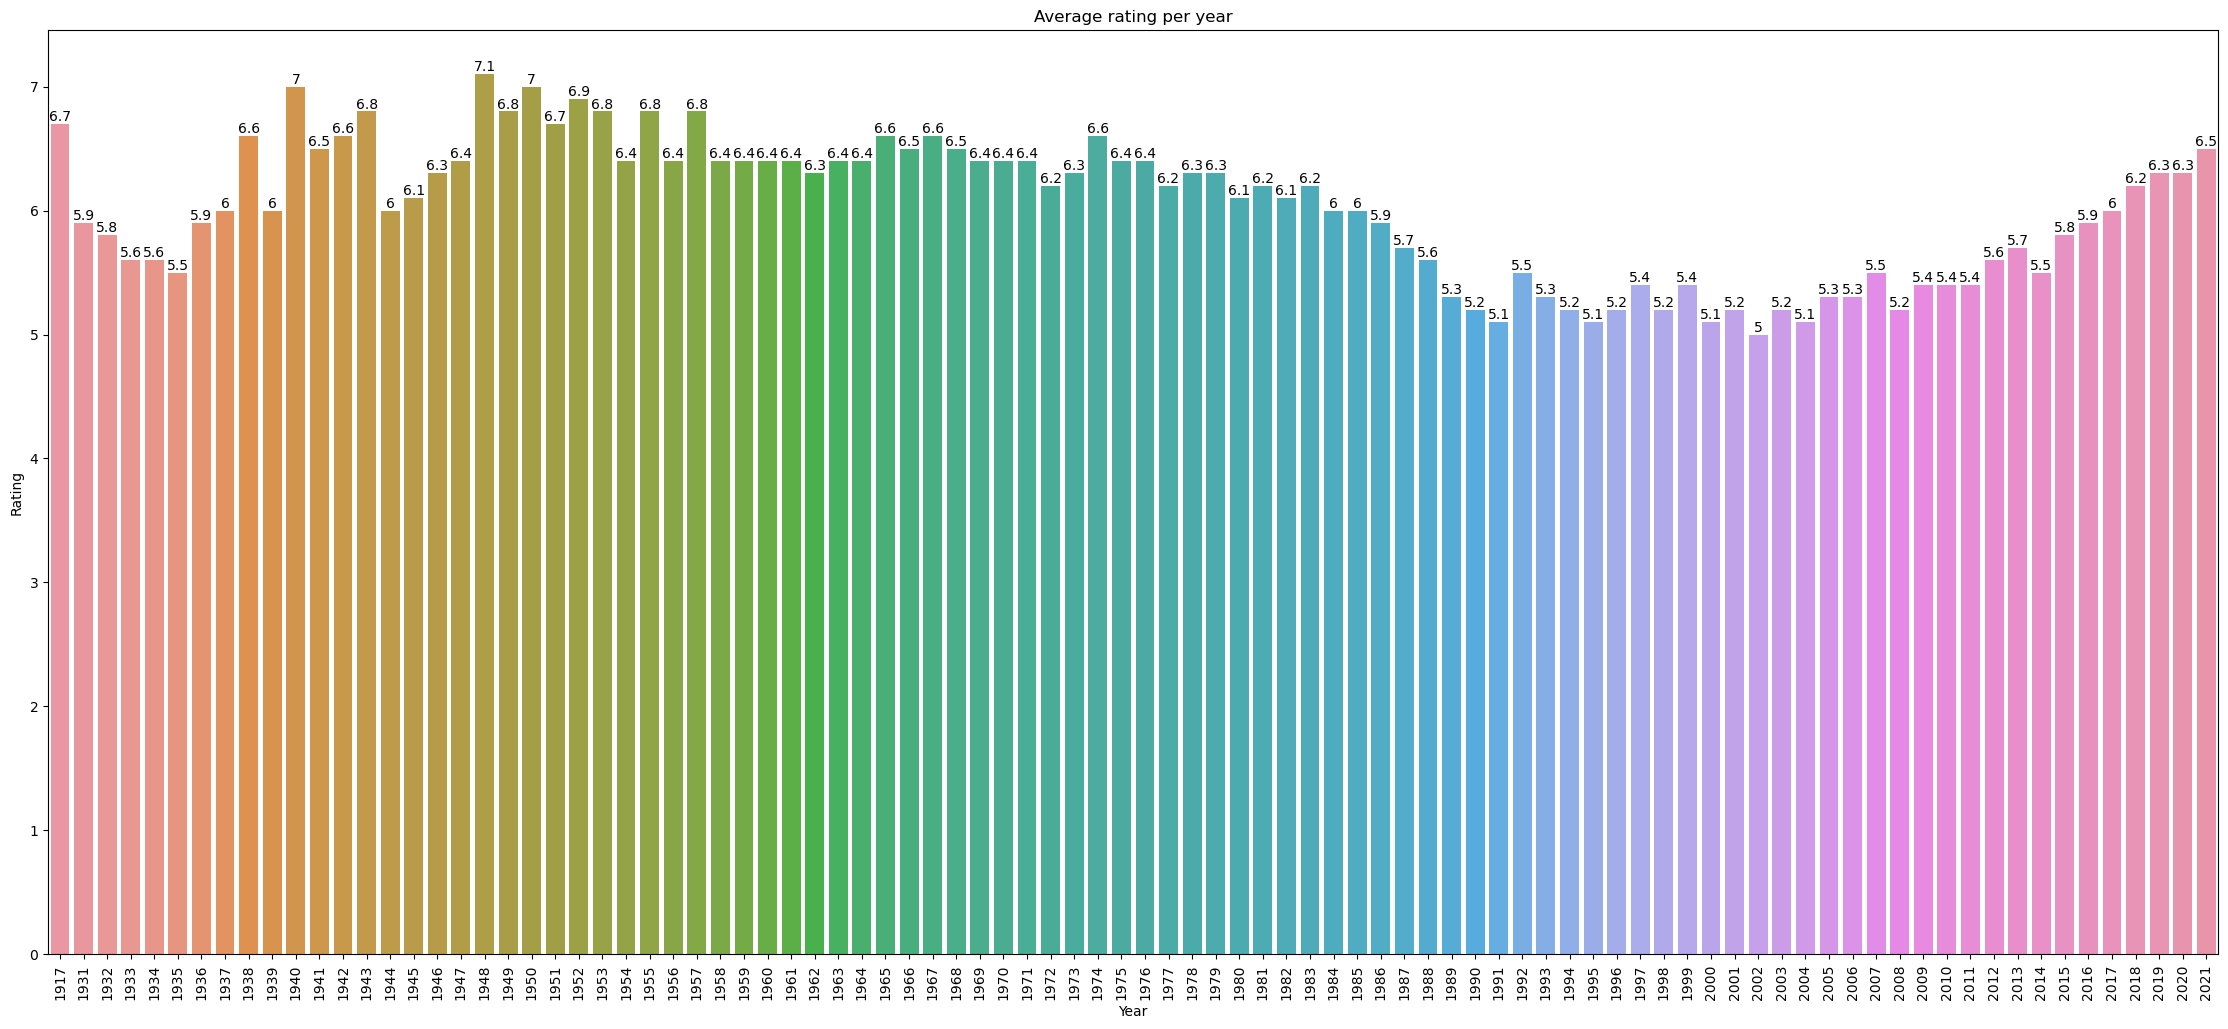

In [65]:
# Average rating per year
year_rating = df.groupby('Year').agg({'Rating': 'mean'}).reset_index().sort_values(by='Rating',
                                                                     ascending=False,
                                                                     )
year_rating['Rating'] = round(year_rating['Rating'],1)

plt.figure(figsize=(28,12))
ax = sns.barplot(data=year_rating, x='Year', y='Rating')
ax.bar_label(ax.containers[0])
plt.title('Average rating per year')
plt.xticks(rotation=90)
plt.show()

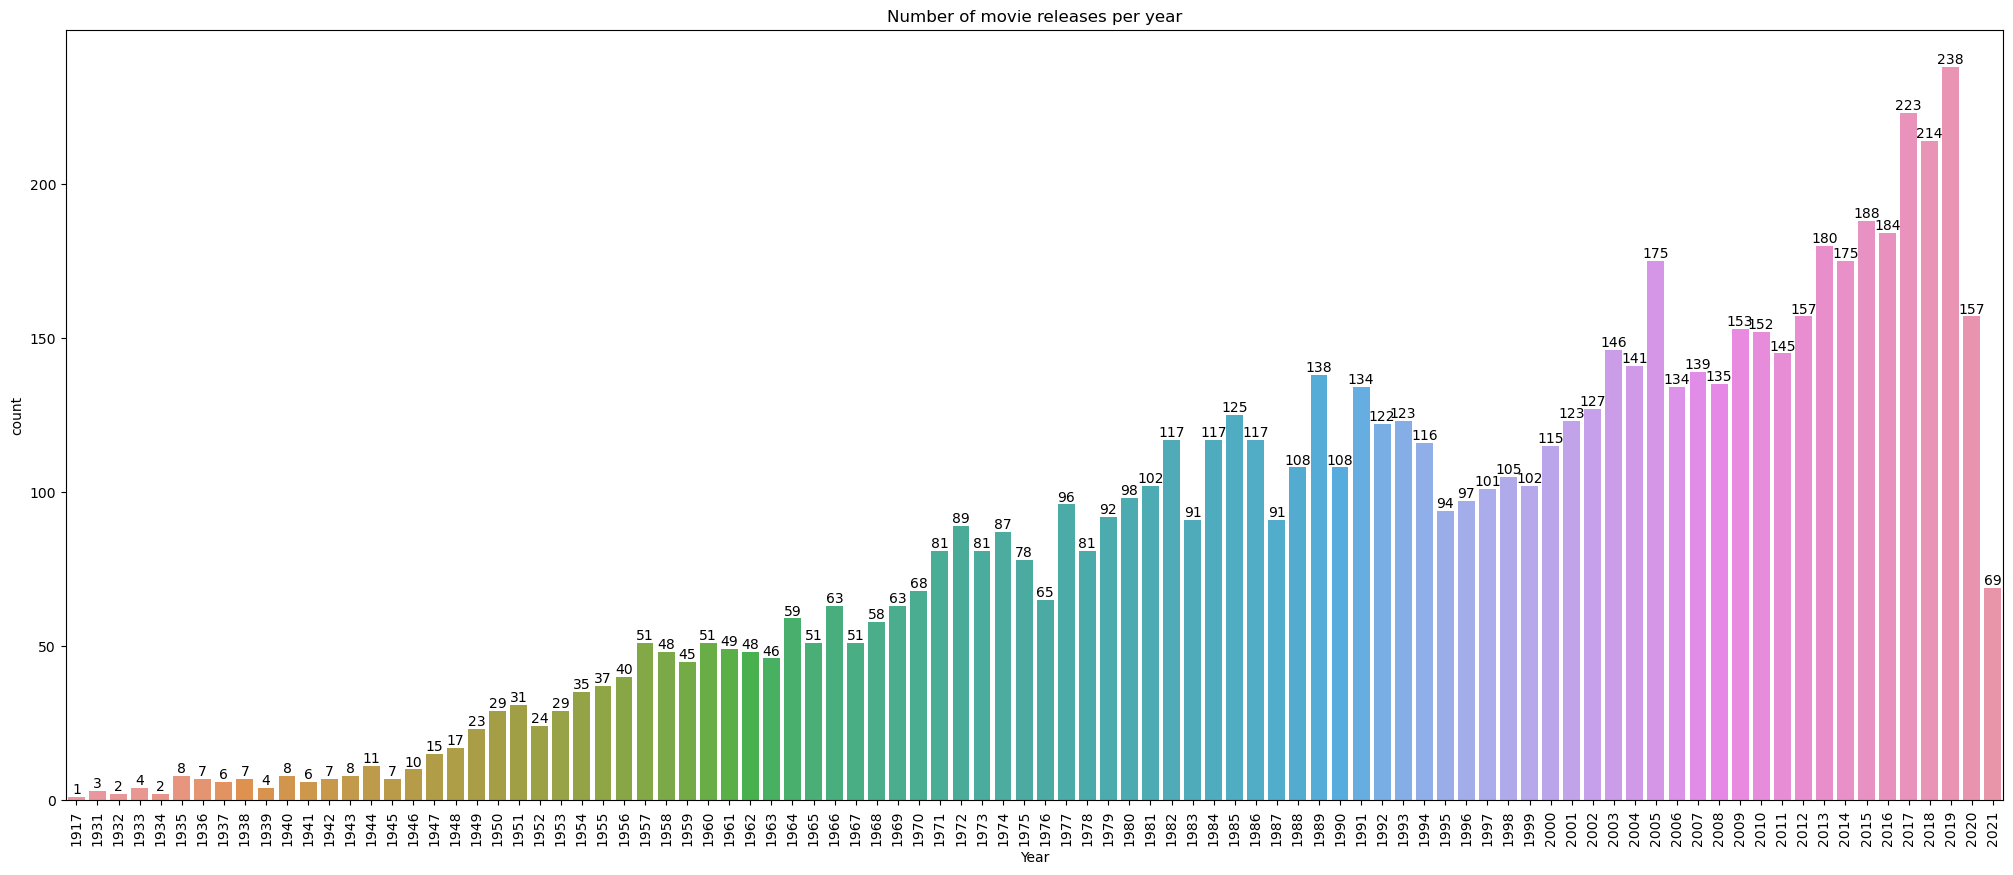

In [67]:
# Number of movie release per year
year_count = df.groupby('Year').agg({'Name':'count'}).rename(columns={'Name':'count'}).\
                                        sort_values(by='count', ascending=False).reset_index()
plt.figure(figsize=(25,10))
ax = sns.barplot(data=year_count, x='Year', y='count')
ax.bar_label(ax.containers[0])
plt.title('Number of movie releases per year')
plt.xticks(rotation=90)
plt.show()

In [69]:
px.line(year_count,y="Year",x="count")

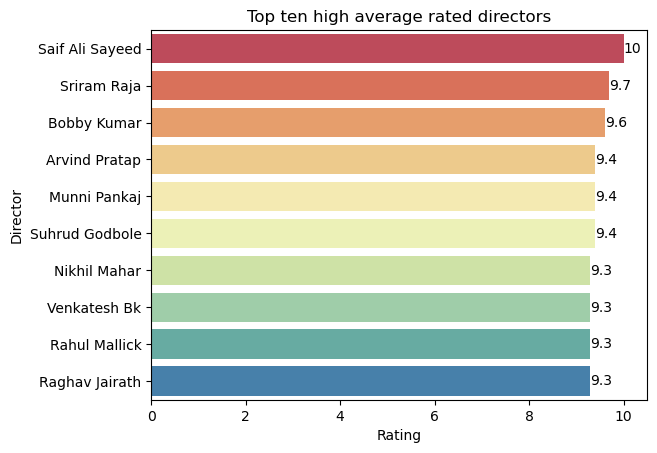

In [78]:
# plot top ten high average rating directors
director_rate = df.groupby('Director').agg({'Rating':'mean'}).sort_values(by='Rating', ascending=False)\
                                      .reset_index().head(10)

ax = sns.barplot(data=director_rate, x='Rating', y='Director', palette='Spectral')
ax.bar_label(ax.containers[0])
plt.title('Top ten high average rated directors')
plt.show()

In [79]:
df.corr()

,Year,Duration,Rating,Votes
Year,1.000000,-0.252662,-0.194990,0.134223
Duration,-0.252662,1.000000,0.013134,0.106796
Rating,-0.194990,0.013134,1.000000,0.134655
Votes,0.134223,0.106796,0.134655,1.000000


<Axes: >

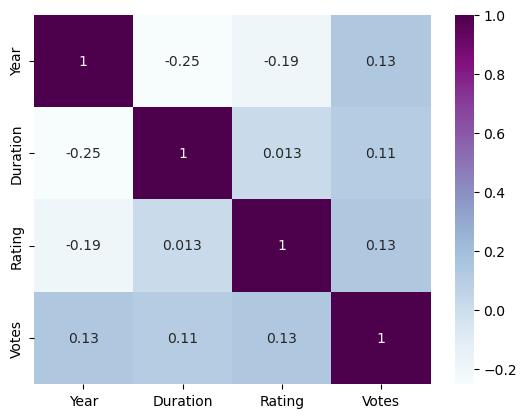

In [80]:
sns.heatmap(df.corr(),annot=True,cmap="BuPu")

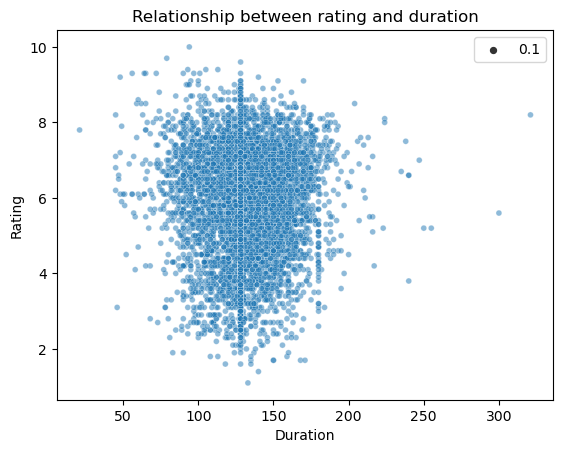

In [81]:
sns.scatterplot(data=df, x='Duration', y='Rating', size=0.1, alpha=0.5)
plt.title('Relationship between rating and duration')
plt.show()

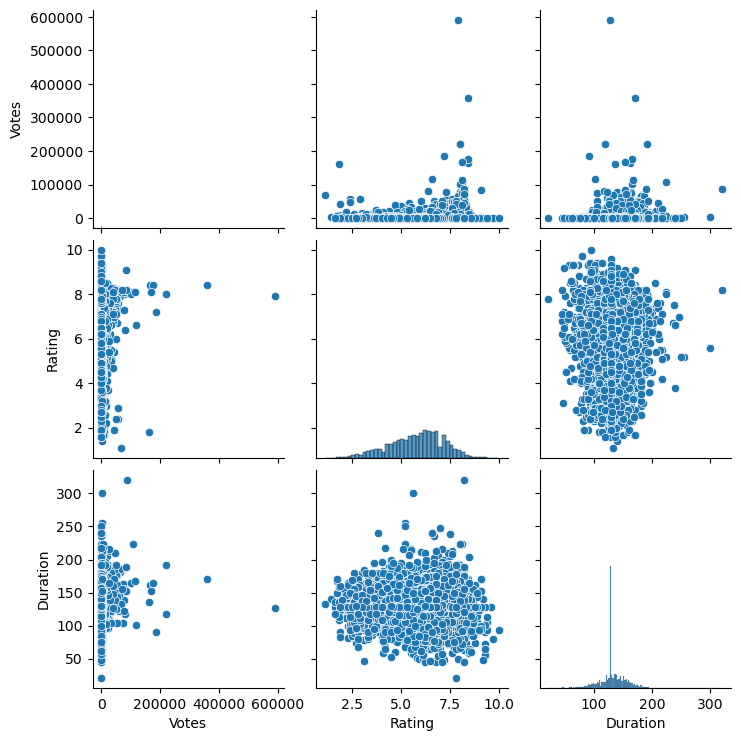

In [82]:
sns.pairplot(df[['Votes', 'Rating', 'Duration']])

<Axes: >

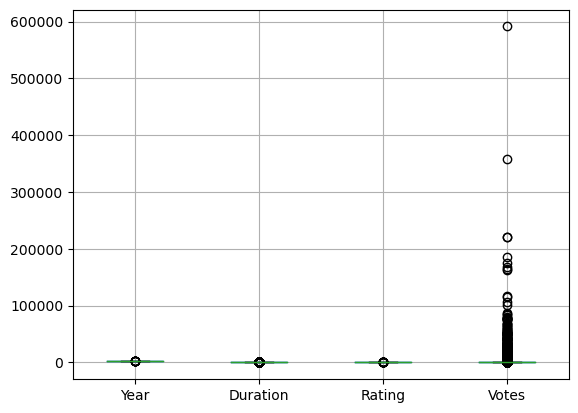

In [83]:
df.boxplot()

TARGET ENCODING

In [85]:
df_update = df.drop(['Name'], axis=1)

In [86]:
actor1_encoding_map = df_update.groupby('Actor 1').agg({'Rating': 'mean'}).to_dict()
actor2_encoding_map = df_update.groupby('Actor 2').agg({'Rating': 'mean'}).to_dict()
actor3_encoding_map = df_update.groupby('Actor 3').agg({'Rating': 'mean'}).to_dict()
director_encoding_map = df_update.groupby('Director').agg({'Rating': 'mean'}).to_dict()
genre_encoding_map = df_update.groupby('Genre').agg({'Rating': 'mean'}).to_dict()

In [87]:
df_update['actor1_encoded'] = round(df_update['Actor 1'].map(actor1_encoding_map['Rating']),1)
df_update['actor2_encoded'] = round(df_update['Actor 2'].map(actor2_encoding_map['Rating']),1)
df_update['actor3_encoded'] = round(df_update['Actor 3'].map(actor3_encoding_map['Rating']),1)
df_update['director_encoded'] = round(df_update['Director'].map(director_encoding_map['Rating']),1)
df_update['genre_encoded'] = round(df_update['Genre'].map(genre_encoding_map['Rating']),1)

In [88]:
df_update.drop(['Actor 1', 'Actor 2', 'Actor 3', 'Director', 'Genre'], axis=1, inplace=True)
df_update.head()

,Year,Duration,Rating,Votes,actor1_encoded,actor2_encoded,actor3_encoded,director_encoded,genre_encoded
1,2019,109.0,7.0,8,6.8,7.0,7.0,7.0,6.3
3,2019,110.0,4.4,35,5.4,4.4,4.4,4.4,5.7
5,1997,147.0,4.7,827,4.8,5.8,5.8,5.4,6.2
6,2005,142.0,7.4,1086,5.3,6.0,6.5,7.5,6.8
8,2012,82.0,5.6,326,5.6,5.9,5.6,5.6,5.5


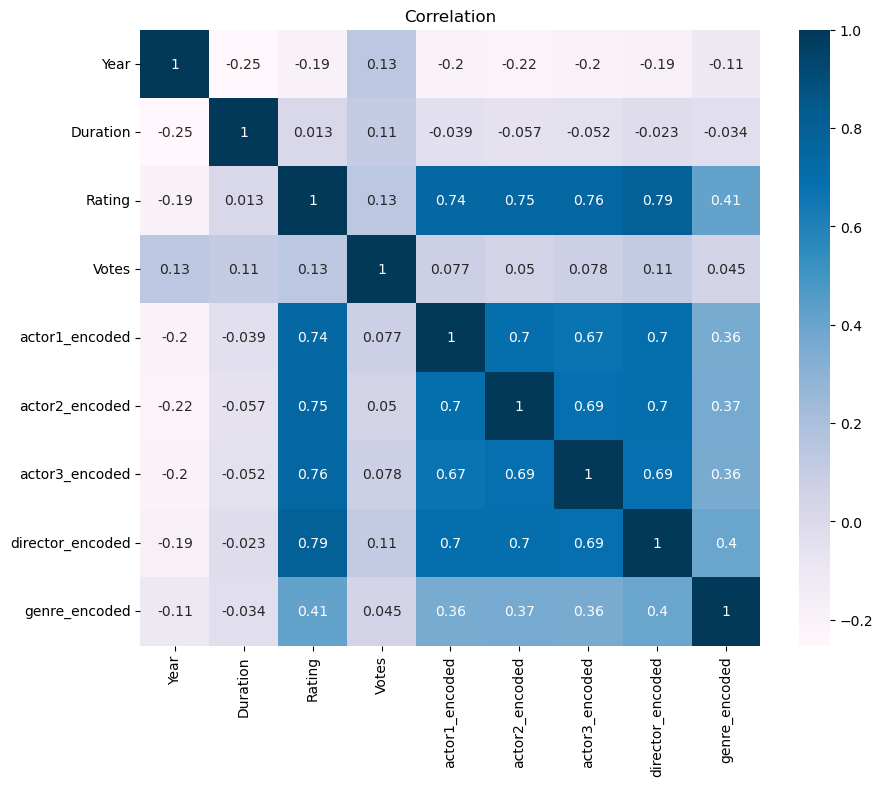

In [92]:
plt.figure(figsize=(10,8))
sns.heatmap(df_update.corr(), annot=True, cmap='PuBu')
plt.title('Correlation')
plt.show()

In [93]:
X = df_update.drop('Rating', axis=1)
y = df_update['Rating']

X.head()

,Year,Duration,Votes,actor1_encoded,actor2_encoded,actor3_encoded,director_encoded,genre_encoded
1,2019,109.0,8,6.8,7.0,7.0,7.0,6.3
3,2019,110.0,35,5.4,4.4,4.4,4.4,5.7
5,1997,147.0,827,4.8,5.8,5.8,5.4,6.2
6,2005,142.0,1086,5.3,6.0,6.5,7.5,6.8
8,2012,82.0,326,5.6,5.9,5.6,5.6,5.5


In [94]:
# split data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [95]:
X_train

,Year,Duration,Votes,actor1_encoded,actor2_encoded,actor3_encoded,director_encoded,genre_encoded
1399,1988,149.0,16,5.6,4.9,5.7,4.2,6.3
10841,2017,96.0,189,6.8,6.0,6.0,5.0,5.9
11637,1980,169.0,475,5.7,6.4,6.6,7.1,5.5
7918,2000,134.0,887,4.8,5.1,4.7,5.2,5.7
4356,1986,139.0,18,5.3,5.1,6.3,6.6,5.5
...,...,...,...,...,...,...,...,...
10533,1996,143.0,206,5.4,4.6,4.6,5.5,5.7
10604,1989,125.0,53,7.2,7.4,7.2,6.5,6.3
10917,1995,146.0,55,5.7,5.6,5.0,5.5,5.5
1594,1989,138.0,66,6.7,6.2,5.5,5.6,6.3


In [96]:
X_test

,Year,Duration,Votes,actor1_encoded,actor2_encoded,actor3_encoded,director_encoded,genre_encoded
6241,1969,104.000000,985,6.4,6.6,6.0,7.0,6.0
3321,1975,118.000000,7,5.6,5.7,6.4,4.9,5.9
6117,1974,133.000000,13,6.3,6.5,6.0,6.1,6.2
5975,2015,90.000000,23,5.7,5.7,5.7,5.7,5.9
6653,1949,128.126519,30,6.9,7.0,6.8,6.5,5.9
...,...,...,...,...,...,...,...,...
13618,2014,100.000000,68,6.4,6.3,5.3,6.3,6.2
11911,1983,128.126519,22,6.4,5.4,5.6,5.5,6.6
14552,1977,128.126519,29,6.4,6.9,6.2,7.2,5.9
7792,1960,151.000000,150,7.0,6.6,6.8,7.2,5.6


In [97]:
y_train

1399     4.2
10841    6.0
11637    6.3
7918     5.1
4356     6.6
        ... 
10533    4.6
10604    7.2
10917    5.0
1594     6.0
14966    4.4
Name: Rating, Length: 6046, dtype: float64

In [98]:
# Initiate the model and fit into the training data
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train, y_train)

# Evaluate the model performance on the training data
print('Coefficient of determination: ', LR.score(X_train, y_train))

Coefficient of determination:  0.7617100996832136


In [99]:
# Evaluate the model performance on the test data
y_pred_LR = LR.predict(X_test)

In [100]:
y_pred_LR

array([6.61783383, 5.48903654, 6.32963989, ..., 6.92620467, 7.21775771,
       5.57822168])

In [101]:
from sklearn.metrics import r2_score

In [104]:
r2_score(y_test, y_pred_LR)*100

75.82382877062483

In [105]:
# Create a `results` dataframe
results = pd.DataFrame({'actual': y_test,
                        'predicted': y_pred_LR.ravel(),
                        'residual': y_test - y_pred_LR}
                      )
results.head()

,actual,predicted,residual
6241,7.4,6.617834,0.782166
3321,4.9,5.489037,-0.589037
6117,6.5,6.329640,0.170360
5975,5.7,5.549325,0.150675
6653,7.0,6.961251,0.038749


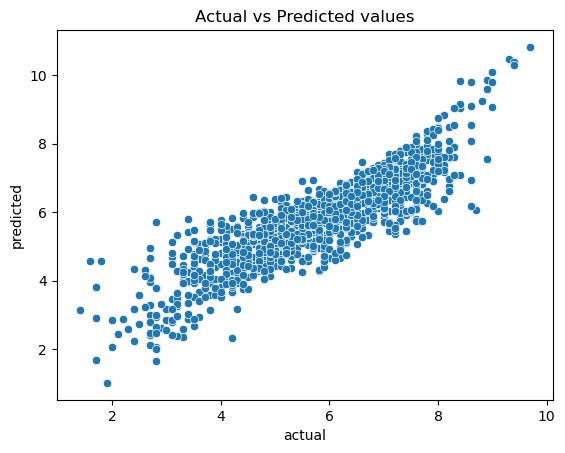

In [106]:
# Create a scatterplot to visualize `predicted` over `actual`
sns.scatterplot(x=results['actual'], y=results['predicted'])
plt.title('Actual vs Predicted values')
plt.show()